In [1]:
from matplotlib import pyplot as plt
from collections import Counter
from typing import List
from DSFS.statistics import *
from DSFS.inference import *
from DSFS.gradient_descent import *

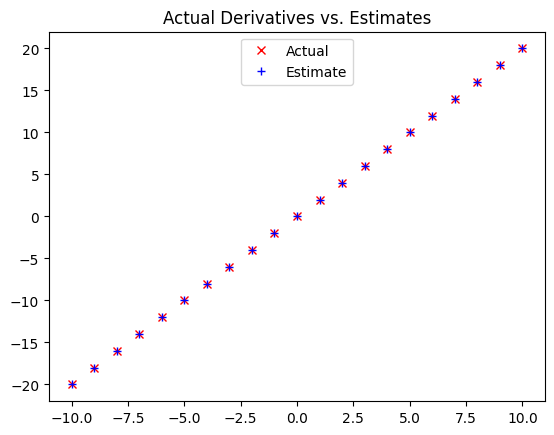

In [2]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [3]:
import random
from DSFS.vectors import Vector, distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(5)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    # print(epoch, v)

    
assert distance(v, [0, 0, 0, 0, 0]) < 0.001

In [4]:
import random
from DSFS.vectors import distance, add, scalar_multiply, vector_mean

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute the gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    # print(epoch, v)
    
assert distance(v, [0, 0, 0]) < 0.001 # v should be close to 0

In [5]:
set_slope = 6
set_intercept = 9
inputs = [(x, set_slope * x + set_intercept) for x in range(-50, 50)]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(10000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    #print(epoch, theta)
    
slope, intercept = theta
assert (set_slope - 0.1) < slope < (set_slope + 0.1), f"Slope should be about {set_slope}"
print(slope, " In range")
assert (set_intercept - 0.1) < intercept < (set_intercept + 0.1), f"Intercept should be about {set_intercept}"
print(intercept, " In range")

5.999999999988043  In range
8.999999980092548  In range


In [6]:
theta = [random.uniform(-1, 1), random]
inputs = [(x, set_slope * x + set_intercept) for x in range(-50, 50)]

print(inputs)

for epoch in range(1000):
    for batch in minibatch(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])        
        theta = gradient_step(theta, grad, -learning_rate)
    #print(epoch, theta)
    
slope, intercept = theta
assert (set_slope - 0.1) < slope < (set_slope + 0.1), f"Slope should be about {set_slope}"
print(slope, " In range")
assert (set_intercept - 0.1) < intercept < (set_intercept + 0.1), f"Intercept should be about {set_intercept}"
print(intercept, " In range")

[(-50, -291), (-49, -285), (-48, -279), (-47, -273), (-46, -267), (-45, -261), (-44, -255), (-43, -249), (-42, -243), (-41, -237), (-40, -231), (-39, -225), (-38, -219), (-37, -213), (-36, -207), (-35, -201), (-34, -195), (-33, -189), (-32, -183), (-31, -177), (-30, -171), (-29, -165), (-28, -159), (-27, -153), (-26, -147), (-25, -141), (-24, -135), (-23, -129), (-22, -123), (-21, -117), (-20, -111), (-19, -105), (-18, -99), (-17, -93), (-16, -87), (-15, -81), (-14, -75), (-13, -69), (-12, -63), (-11, -57), (-10, -51), (-9, -45), (-8, -39), (-7, -33), (-6, -27), (-5, -21), (-4, -15), (-3, -9), (-2, -3), (-1, 3), (0, 9), (1, 15), (2, 21), (3, 27), (4, 33), (5, 39), (6, 45), (7, 51), (8, 57), (9, 63), (10, 69), (11, 75), (12, 81), (13, 87), (14, 93), (15, 99), (16, 105), (17, 111), (18, 117), (19, 123), (20, 129), (21, 135), (22, 141), (23, 147), (24, 153), (25, 159), (26, 165), (27, 171), (28, 177), (29, 183), (30, 189), (31, 195), (32, 201), (33, 207), (34, 213), (35, 219), (36, 225), 

TypeError: unsupported operand type(s) for +: 'float' and 'module'